# Exploratory Data Analysis (EDA) – CIFAR-10

In this notebook, we explore the CIFAR-10 dataset before training a deep learning model.

The goals of this EDA are:

- Inspect dataset size
- Examine image dimensions
- Visualize sample images
- Check class distribution

In [14]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Load CIFAR-10 Dataset

We load the training and test sets using torchvision.
The dataset has already been downloaded and tracked with DVC,
so we set `download=False`.

In [15]:
transform = transforms.ToTensor()

train_dataset = torchvision.datasets.CIFAR10(
    root="../data",
    train=True,
    download=False,
    transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root="../data",
    train=False,
    download=False,
    transform=transform
)

print("Train size:", len(train_dataset))
print("Test size:", len(test_dataset))


Train size: 50000
Test size: 10000


### Dataset Size

We verify the number of samples in the training and test sets.

In [16]:
img, label = train_dataset[0]

print("Image shape:", img.shape)
print("Class:", train_dataset.classes[label])


Image shape: torch.Size([3, 32, 32])
Class: frog


### Image Shape and Label Example

We inspect one sample image to understand:

- Tensor shape
- Number of channels
- Associated class label


In [17]:
img, label = train_dataset[0]

print("Image tensor shape:", img.shape)
print("Number of channels:", img.shape[0])
print("Height:", img.shape[1])
print("Width:", img.shape[2])
print("Class index:", label)
print("Class name:", train_dataset.classes[label])

Image tensor shape: torch.Size([3, 32, 32])
Number of channels: 3
Height: 32
Width: 32
Class index: 6
Class name: frog


### Sample Images

We visualize several images from the dataset
to better understand the types of objects and variations.


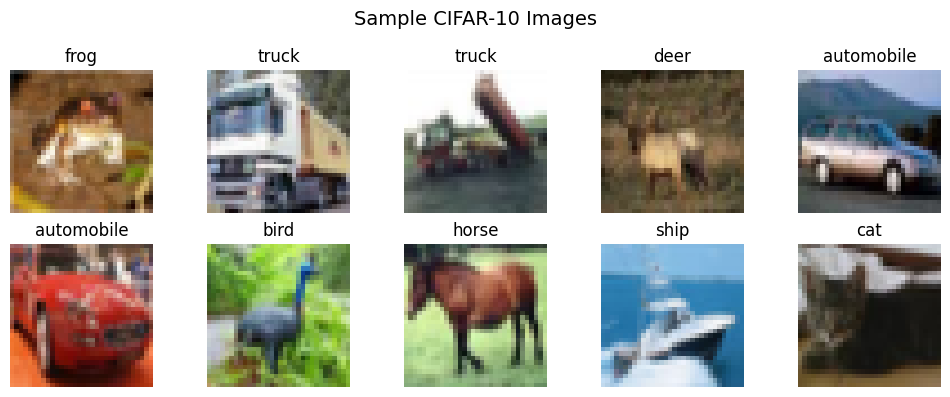

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flatten()):
    img, label = train_dataset[i]
    img = img.permute(1, 2, 0).numpy()  # Convert CHW → HWC
    ax.imshow(img)
    ax.set_title(train_dataset.classes[label])
    ax.axis("off")

plt.suptitle("Sample CIFAR-10 Images", fontsize=14)
plt.tight_layout()
plt.show()

### Class Distribution

We check whether the dataset is balanced
by counting the number of samples per class.


In [19]:
from collections import Counter

# Extract all labels
labels = [train_dataset[i][1] for i in range(len(train_dataset))]

# Count occurrences
counter = Counter(labels)

print("Class distribution:\n")
for class_id, count in counter.items():
    print(f"{train_dataset.classes[class_id]:<12} : {count}")

Class distribution:

frog         : 5000
truck        : 5000
deer         : 5000
automobile   : 5000
bird         : 5000
horse        : 5000
ship         : 5000
cat          : 5000
dog          : 5000
airplane     : 5000


### Visualize Class Distribution

We check whether the dataset is balanced
by counting the number of samples per class.


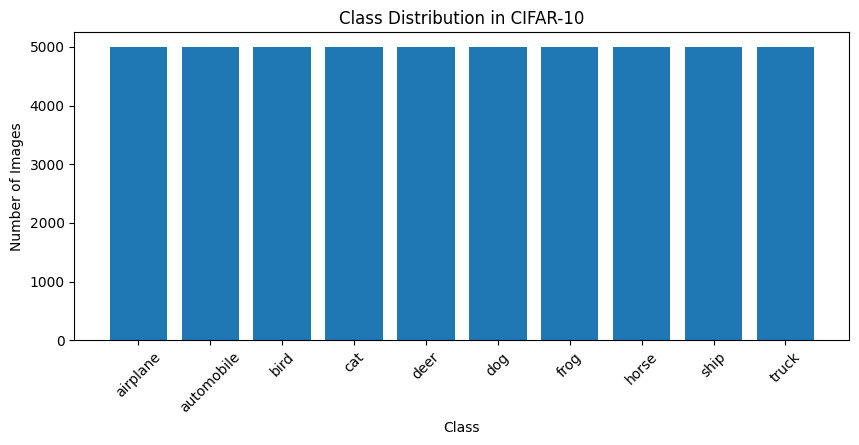

In [20]:
class_names = train_dataset.classes
counts = [counter[i] for i in range(len(class_names))]

plt.figure(figsize=(10, 4))
plt.bar(class_names, counts)
plt.xticks(rotation=45)
plt.title("Class Distribution in CIFAR-10")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.show()

## EDA Summary

- CIFAR-10 contains 50,000 training images and 10,000 test images.
- Each image has shape 3x32x32 (RGB).
- The dataset contains 10 classes.
- The dataset is balanced (5,000 images per class).
- No missing values were observed.

This confirms that the dataset is well-structured
and suitable for training a convolutional neural network.